Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


In [2]:
sys.path.append('../')
from scripts.preprocess import Preprocess
from scripts.logger import Logger
from scripts.plot import Plot
from scripts.utilities import Utilities

preprocess = Preprocess()
plot = Plot()
utils = Utilities()

Load raw dataframe

In [3]:
train_df = utils.get_df(path='data/train.csv',rep='../',rev='tagv1')
test_df = utils.get_df(path='data/test.csv',rep='../', rev='tagv1')
store_df = utils.get_df(path='data/store.csv',rep='../',rev='tagv1')
sub_df = utils.get_df(path='data/sample_submission.csv', rep='../', rev='tagv1')


/home/nardos/Documents/10Academy/Pharmaceutical/Pharmaceutical-Sales-Prediction/notebooks/../scripts/utilities.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(io.StringIO(data))


Load Preprocessed dataframe

In [4]:
train_store = pd.read_csv('../data/train_store.csv')
test_store = pd.read_csv('../data/test_store.csv')
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [5]:
train_df["Date"]

0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
              ...    
1017204    2013-01-01
1017205    2013-01-01
1017206    2013-01-01
1017207    2013-01-01
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

Extact Month from data

In [6]:
train_store = preprocess.to_datetime(train_store, 'Date')
train_store.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [7]:
# Separating the date column for further analysis
preprocess.to_datetime(train_df, 'Date')
train_store['Year'] =  train_store['Date'].apply(lambda x: x.year)
train_store['Month'] = train_store['Date'].apply(lambda x: x.month)
train_store['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
# Identifying if the day is weekend or weekday
train_store['Weekday'] = train_store['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) 

In [8]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,1
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,1
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,1
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,1
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,1


Distribution of training and test sets 

In [9]:
# sns.lineplot(x="Month", y="Sales",
#              hue="Store", 
#              data=train_store)

In [10]:
# aggregated df from sales mean and custmers mean
seasonal = train_df.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[2:,:]
seasonal.head()

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


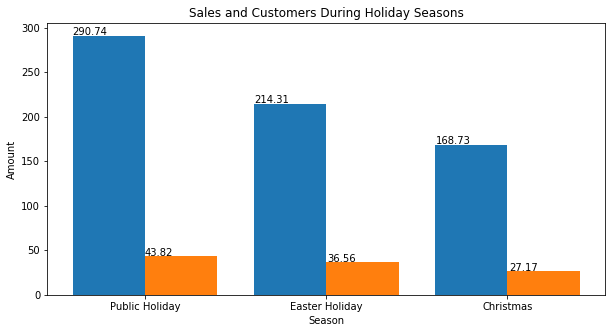

In [11]:
# seasonal index
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))     
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.show()


- We can see from the above comparation "no holiday" has more purchase
- public holidays have more  purchase,
- Christmas has the least purchase sales

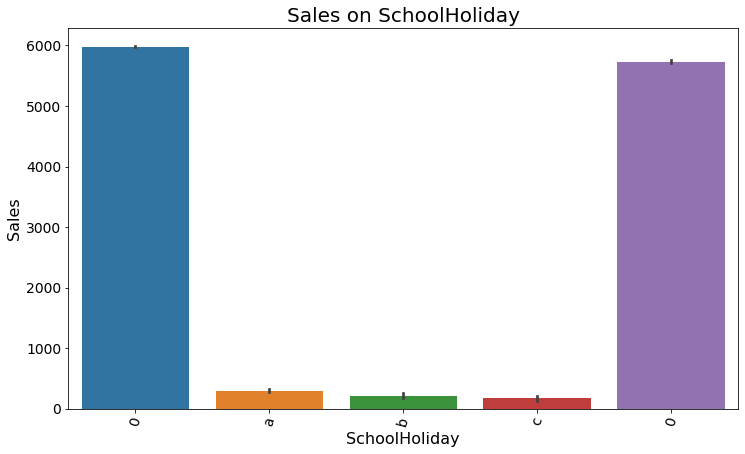

In [12]:
plot.plot_bar(train_df, 'StateHoliday', 'Sales', 'Sales on SchoolHoliday', 'SchoolHoliday', 'Sales')

Seasonal (Christmas, Easter etc) purchase behaviours,

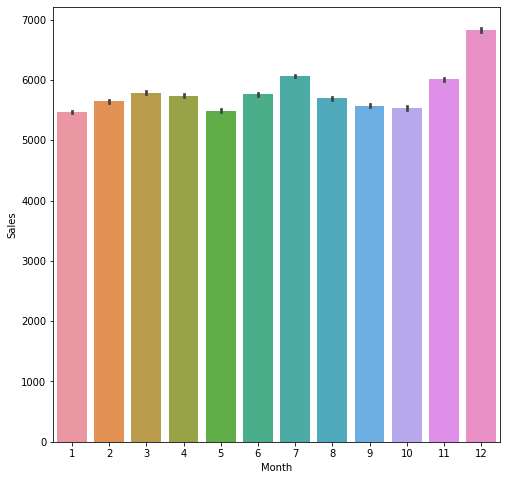

In [13]:
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Sales', data=train_store)
plt.show()

In [14]:
year_df = train_store.groupby(['Year'])['Sales'].mean().reset_index()
year_df

,Year,Sales
0,2013,5658.533675
1,2014,5833.290704
2,2015,5878.245380


In [15]:
# train_df.columns
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'DayOfMonth',
       'Weekday'],
      dtype='object')

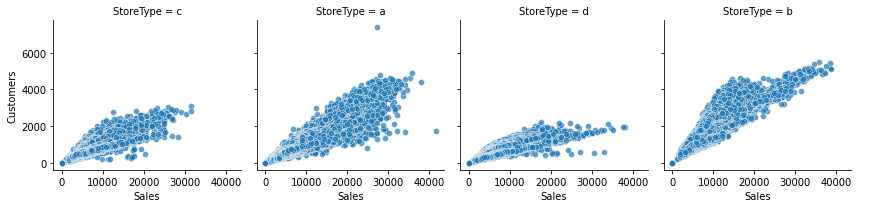

In [16]:
g = sns.FacetGrid(train_store, col="StoreType")
g.map(sns.scatterplot, "Sales", "Customers", alpha=.7)
g.add_legend()


Show that there is a positive correlation between the number of sales and the number of customers

In [17]:
sales_customer_rln = train_df.loc[:,['Sales','Customers']]
sales_cutomer_corr = sales_customer_rln.corr()
sales_cutomer_corr.head()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


In [18]:
sales_promo_rln = train_store.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr.head()

,Sales,Promo
Sales,1.000000,0.452345
Promo,0.452345,1.000000


Correlation between sales and number of customers

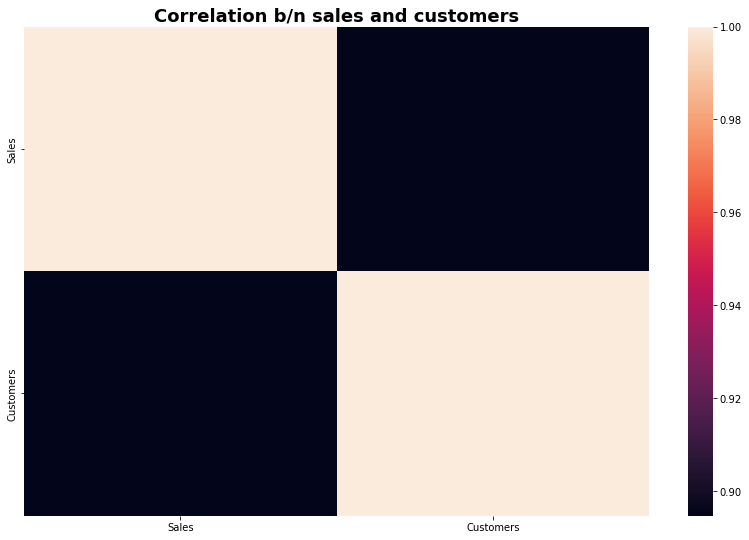

In [19]:
plot.plot_heatmap_from_correlation(sales_cutomer_corr, 'Correlation b/n sales and customers')

How does promo affect sales?

In [ ]:
sales_promo_rln = train_store.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr.head()

- Promotion affects the sales in a positive way, the increase to promotion leads to

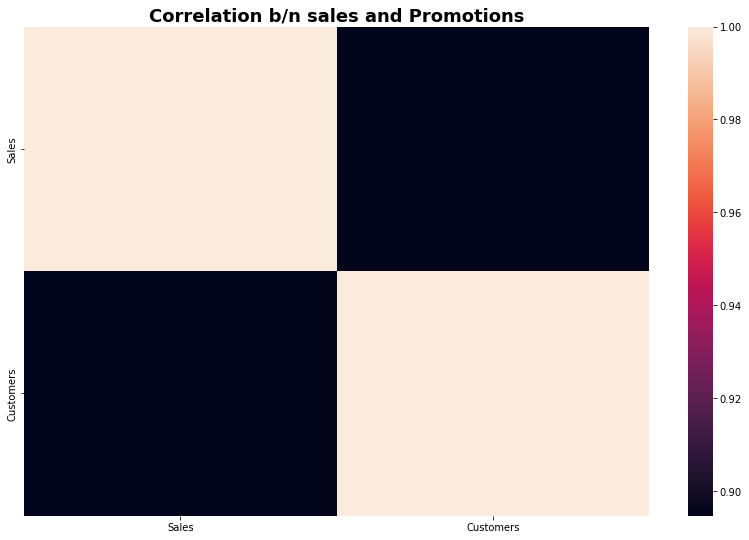

In [21]:
plot.plot_heatmap_from_correlation(sales_customers, 'Correlation b/n sales and Promotions')

- It can be clearly seen that there is a positive correlation between the number of sales and the number of customers


Trends of customer behavior during store open and closing times

In [55]:
# stores that are open on weekends
closed_stores_df = train_store.loc[((train_store["Open"] == 0) & (train_store["Weekday"] == 0))]

closed_stores = closed_stores_df["Store"].value_counts().index.to_list()
stores_lis = train_store["Store"].value_counts().index.to_list()
open_stores = []

for x in stores_lis: 
    if (x not in closed_stores):
        open_stores.append(x)

print(f" The number of stores is {len(stores_lis)}, and the number of closed stores is {len(closed_stores)}")

print(f'Therefore the open store on weekdays are:{open_stores}')

 The number of stores is 1115, and the number of closed stores is 1105
Therefore the open store on weekdays are:[733, 682, 769, 562, 1097, 262, 85, 423, 335, 494]


per-store sales for open stores:  4688.3152866242035
Per-store sales for closed stores:  5783.965386603743


<AxesSubplot:xlabel='Stores', ylabel='Sales'>

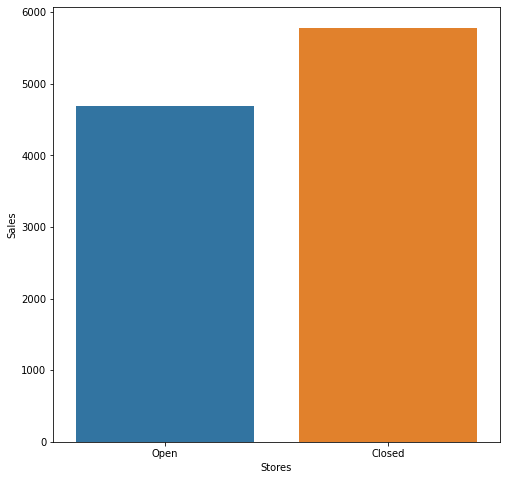

In [56]:
open_stores_df = train_df.loc[train_store["Store"].isin(open_stores)]
closed_stores_df = train_df.loc[train_store["Store"].isin(closed_stores)]

# sales in the weekend

print("per-store sales for open stores: ", (open_stores_df["Sales"].mean()))
print("Per-store sales for closed stores: ", (closed_stores_df["Sales"].mean()))

sales_weekday = {"Stores":["Open", "Closed"], "Sales":[open_stores_df["Sales"].mean(), closed_stores_df["Sales"].mean()]}
plt.figure(figsize=(8,8))
sns.barplot(x = "Stores", y = "Sales", data= pd.DataFrame(sales_weekday))

In [23]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'DayOfMonth',
       'Weekday'],
      dtype='object')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

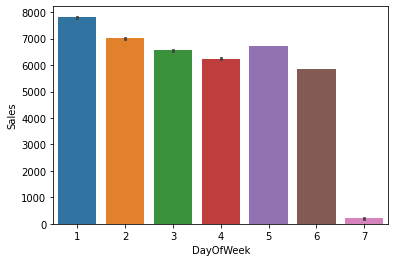

In [24]:
sns.barplot(x = "DayOfWeek", y = "Sales", data= train_store)

- Shows that sales of the last day of the week is amlost close to 0, none

 How the assortment type affects sales


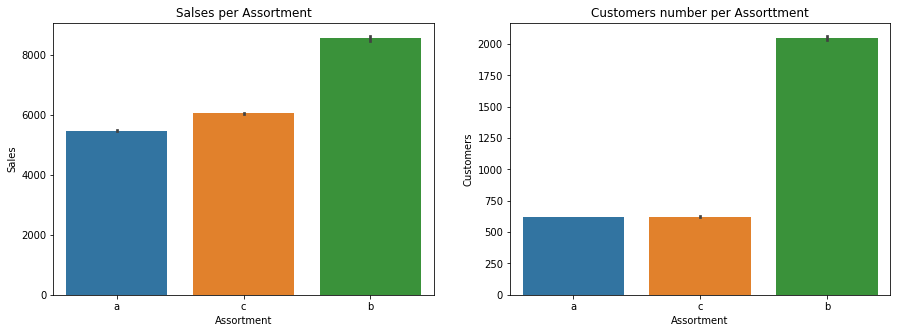

In [ ]:
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="Assortment", y="Sales", data=train_store, ax=axi1).set_title("Salses per Assortment")
sns.barplot(x="Assortment", y="Customers", data=train_store, ax=axi2).set_title("Customers number per Assorttment")
plt.show()

- Assortment b has highes sales and a has the lowest

How does the opening or reopening of new competitors affect stores